### How good is the Great Weapon Fighter (GWP) Feat in Dungeons and Dragons?


## Great Weapon Master

**Prerequisite:** Strength 13 or higher

**You've learned to put the weight of a weapon to your advantage, letting its momentum empower your strikes. You gain the following benefits:**

- On your turn, when you score a critical hit with a melee weapon or reduce a creature to 0 hit points with one, you can make one melee weapon attack as a bonus action.

- Before you make a melee attack with a heavy weapon that you are proficient with, you can choose to take a -5 penalty to the attack roll. If the attack hits, you add +10 to the attack's damage.

In [73]:
#   Imports
import random 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [74]:
def simulate_attack(ac=10, gwp=False, roll=0):  #   Simulating an attack with and without gwp
    # Apply GWM penalty if it's enabled
    if gwp:
        roll -= 5
    if roll <= ac:
        return 0
    damage = random.randint(1, 6) + random.randint(1, 6)    #   2d6
    if gwp:
        damage += 10
    return damage

In [75]:
def average_damage_per_turn(ac_values, gwp):
    avg_damage = []
    for ac in ac_values:
        total_damage = 0
        for _ in range(100):    #   Can increase the number of rounds here
            roll = random.randint(1, 20)
            total_damage += simulate_attack(ac, gwp, roll)
        avg_damage.append(total_damage / 100)   #   If increasing number of rounds also change it here
    return avg_damage

In [76]:
ac_values = range(1, 21)  # From AC 1 to 20

# Calculate average damage for both GWM and non-GWM cases
avg_damage_gwm = average_damage_per_turn(ac_values, gwp=True)
avg_damage_no_gwm = average_damage_per_turn(ac_values, gwp=False)
avg_damage_gwm,avg_damage_no_gwm

([12.37,
  12.13,
  9.29,
  8.99,
  8.77,
  6.59,
  7.16,
  5.42,
  4.29,
  3.93,
  3.27,
  2.79,
  1.65,
  0.74,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [6.59,
  7.18,
  6.62,
  6.57,
  5.6,
  4.41,
  4.47,
  4.93,
  3.8,
  2.93,
  2.78,
  2.37,
  2.56,
  1.91,
  1.77,
  1.03,
  1.04,
  0.69,
  0.77,
  0.0])

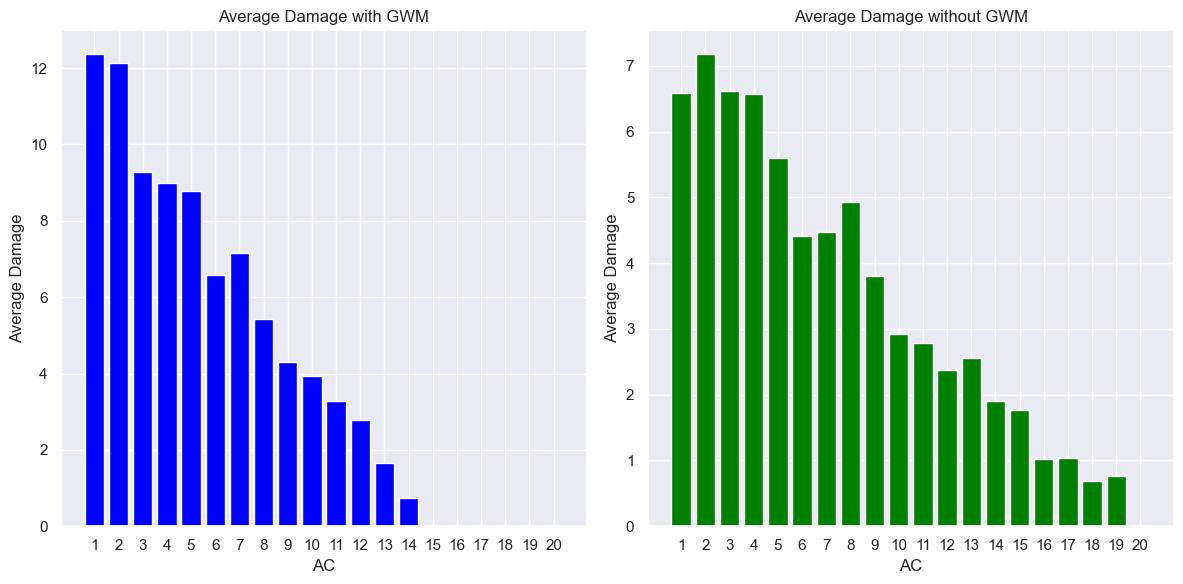

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#   Bar Chart for GWP
ax1.bar(ac_values, avg_damage_gwm, color='blue')
ax1.set_title('Average Damage with GWM')
ax1.set_xlabel('AC')
ax1.set_ylabel('Average Damage')
ax1.set_xticks(np.arange(1, 21, 1))

# Bar chart for non-GWM
ax2.bar(ac_values, avg_damage_no_gwm, color='green')
ax2.set_title('Average Damage without GWM')
ax2.set_xlabel('AC')
ax2.set_ylabel('Average Damage')
ax2.set_xticks(np.arange(1, 21, 1))

# Show the plots
plt.tight_layout()
plt.show()

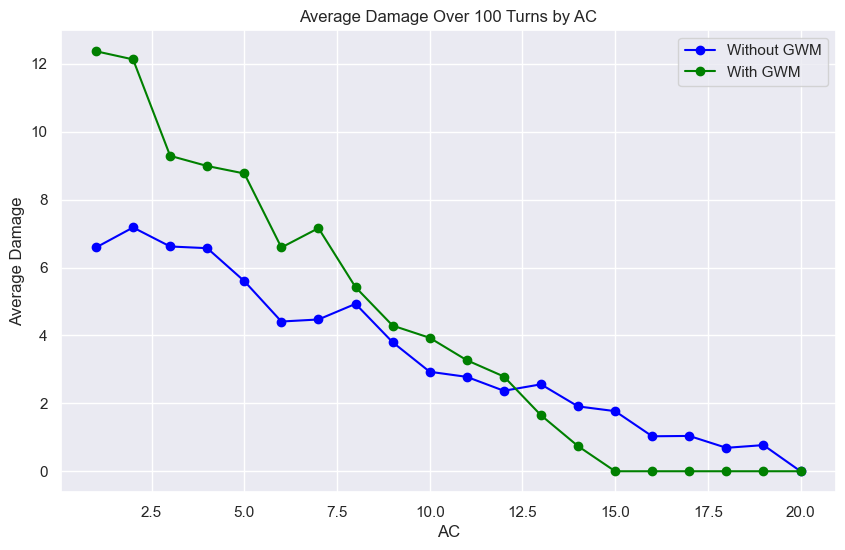

In [78]:
plt.figure(figsize=(10, 6))

# Line for damage without GWM
plt.plot(ac_values, avg_damage_no_gwm, label='Without GWM', marker='o', color='blue')

# Line for damage with GWM
plt.plot(ac_values, avg_damage_gwm, label='With GWM', marker='o', color='green')

plt.title('Average Damage Over 100 Turns by AC')
plt.xlabel('AC')
plt.ylabel('Average Damage')

plt.legend()
plt.grid(True)